In [1]:
import numpy as np
import pandas as pd
import time

import os
import json
from pathlib import Path

import matplotlib.pyplot as plt
from matplotlib import colors
import numpy as np
from pathlib import Path

#for dirname, _, filenames in os.walk('/kaggle/input'):
for dirname, _, filenames in os.walk("input"):
    print(dirname)

input
input\evaluation
input\test
input\training


In [2]:
#data_path = Path('/kaggle/input/abstraction-and-reasoning-challenge/')
data_path = Path('input/')
training_path = data_path / 'training'
evaluation_path = data_path / 'evaluation'
test_path = data_path / 'test'
training_tasks = sorted(os.listdir(training_path))
eval_tasks = sorted(os.listdir(evaluation_path))

In [3]:
#已解決的ID
solved_id=set()
solved_eva_id=set()

In [4]:
T = training_tasks
Trains = []
for i in range(400):
    task_file = str(training_path / T[i])
    task = json.load(open(task_file, 'r'))
    Trains.append(task)
    
E = eval_tasks
Evals= []
for i in range(400):
    task_file = str(evaluation_path / E[i])
    task = json.load(open(task_file, 'r'))
    Evals.append(task)

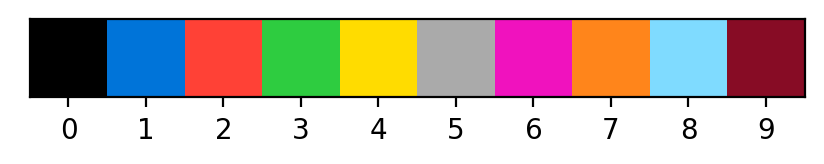

In [5]:
cmap = colors.ListedColormap(
    ['#000000', '#0074D9','#FF4136','#2ECC40','#FFDC00',
     '#AAAAAA', '#F012BE', '#FF851B', '#7FDBFF', '#870C25'])
norm = colors.Normalize(vmin=0, vmax=9)
# 0:black, 1:blue, 2:red, 3:greed, 4:yellow,
# 5:gray, 6:magenta, 7:orange, 8:sky, 9:brown
plt.figure(figsize=(5, 2), dpi=200)
plt.imshow([list(range(10))], cmap=cmap, norm=norm)
plt.xticks(list(range(10)))
plt.yticks([])
plt.show()

def plot_task(task):
    n = len(task["train"]) + len(task["test"])
    fig, axs = plt.subplots(2, n, figsize=(4*n,8), dpi=50)
    plt.subplots_adjust(wspace=0, hspace=0)
    fig_num = 0
    
    for i, t in enumerate(task["train"]):
        t_in, t_out = np.array(t["input"]), np.array(t["output"])
        axs[0][fig_num].imshow(t_in, cmap=cmap, norm=norm)
        axs[0][fig_num].set_title(f'Train-{i} in')
        axs[0][fig_num].set_yticks(list(range(t_in.shape[0])))
        axs[0][fig_num].set_xticks(list(range(t_in.shape[1])))
        axs[1][fig_num].imshow(t_out, cmap=cmap, norm=norm)
        axs[1][fig_num].set_title(f'Train-{i} out')
        axs[1][fig_num].set_yticks(list(range(t_out.shape[0])))
        axs[1][fig_num].set_xticks(list(range(t_out.shape[1])))
        fig_num += 1
    for i, t in enumerate(task["test"]):
        t_in, t_out = np.array(t["input"]), np.array(t["output"])
        axs[0][fig_num].imshow(t_in, cmap=cmap, norm=norm)
        axs[0][fig_num].set_title(f'Test-{i} in')
        axs[0][fig_num].set_yticks(list(range(t_in.shape[0])))
        axs[0][fig_num].set_xticks(list(range(t_in.shape[1])))
        axs[1][fig_num].imshow(t_out, cmap=cmap, norm=norm)
        axs[1][fig_num].set_title(f'Test-{i} out')
        axs[1][fig_num].set_yticks(list(range(t_out.shape[0])))
        axs[1][fig_num].set_xticks(list(range(t_out.shape[1])))
        fig_num += 1
    
    plt.tight_layout()
    plt.show()

In [6]:

def plot_picture(x):
    plt.imshow(np.array(x), cmap = cmap, norm = norm)
    plt.show()

In [7]:
def Defensive_Copy(A): 
    if type(A)!=list:
        A=A.tolist()
    n = len(A)
    k = len(A[0])
    L = np.zeros((n,k), dtype = int)
    for i in range(n):
        for j in range(k):
            L[i,j] = 0 + A[i][j]
    return L.tolist()

In [8]:
def Create(task, task_id = 0):
    n = len(task['train'])
    Input = [Defensive_Copy(task['train'][i]['input']) for i in range(n)]
    Output = [Defensive_Copy(task['train'][i]['output']) for i in range(n)]
    Input.append(Defensive_Copy(task['test'][task_id]['input']))
    return Input, Output

In [9]:
def getObjectHash(pixmap):
    flat = pixmap.flatten().astype(np.bool)
    mult = np.array([2 ** x for x in range(len(flat))])
    return np.sum(flat * mult)
#經測試沒有overflow問題
def groupByColor(pixmap):
    nb_colors = int(pixmap.max()) + 1
    splited = [(pixmap == i) * i for i in range(1, nb_colors)]
    return [x for x in splited if np.any(x)]
def checkColorMap(a0,b0):
    a=np.array(a0)
    b=np.array(b0)
    a[a==0]=10
    b[b==0]=10
    c = 1
    inp_hashes = sorted([getObjectHash(pm) for pm in groupByColor(a)])
    out_hashes = sorted([getObjectHash(pm) for pm in groupByColor(b)])
    c *= inp_hashes == out_hashes
    return bool(c)
def findColorMap(a,b):
    colormap = {}
    a1=np.array(a).flatten()
    b1=np.array(b).flatten()

    for col, idx in zip(*np.unique(a1,return_index=True)):
        if col in colormap.keys(): continue
        colormap[col] = b1[idx]
    return colormap
def applyColorMap(pixmap, colormap):
    a1=np.array(pixmap)
    for i in range(a1.shape[0]):
        for j in range(a1.shape[1]):
            if a1[i][j] not in colormap: #
                continue #
            a1[i][j]=colormap[pixmap[i][j]]
    return a1.tolist()

In [10]:
#basic
def findcrossmap0(a0,b0):
    a=np.array(a0)
    b=np.array(b0)
    name_dic={}
    crossdict={}
    for i in range(len(a0)-3+1):
        for j in range(len(a0[0])-3+1):
            if a0[i][j]==BACKGROUND and a0[i+1][j]!=BACKGROUND and a0[i+2][j]==BACKGROUND and a0[i][j+1]!=BACKGROUND \
            and a0[i+1][j+1]!=BACKGROUND and a0[i+2][j+1]!=BACKGROUND and a0[i][j+2]==BACKGROUND and a0[i+1][j+2]!=BACKGROUND \
            and a0[i+2][j+2]==BACKGROUND:
                if str(a[i:i+3,j:j+3]) in crossdict.keys() and \
                (crossdict[str(a[i:i+3,j:j+3])]!=b[i:i+3,j:j+3]).any():
                    return -1
                else:
                    name_dic[str(a[i:i+3,j:j+3])]=a[i:i+3,j:j+3]
                    crossdict[str(a[i:i+3,j:j+3])]=b[i:i+3,j:j+3]
    if len(name_dic)==0:
        return -1
    return name_dic,crossdict

In [11]:
a=Trains[150]["train"][1]["input"]
b=Trains[150]["train"][1]["output"]
findcrossmap0(a,b)

NameError: name 'BACKGROUND' is not defined

In [12]:
BACKGROUND=0
def findcrossmap(basic_task):
    BACKGROUND=0 #
    Input = [Defensive_Copy(x) for x in basic_task[0]]
    Output = [Defensive_Copy(y) for y in basic_task[1]]
    Test_Case = Input[-1]
    Input = Input[:-1]
    name_dic={}
    crossdict={}
    for x, y in zip(Input,Output):
        x_array=np.array(x)
        y_array=np.array(y)
        if x_array.shape!=y_array.shape:
            return -1
        for i in range(len(x)-3+1):
            for j in range(len(x[0])-3+1):
                if x[i][j]==BACKGROUND and x[i+1][j]!=BACKGROUND and x[i+2][j]==BACKGROUND and x[i][j+1]!=BACKGROUND \
                and x[i+1][j+1]!=BACKGROUND and x[i+2][j+1]!=BACKGROUND and x[i][j+2]==BACKGROUND and x[i+1][j+2]!=BACKGROUND \
                and x[i+2][j+2]==BACKGROUND:
                    if str(x_array[i:i+3,j:j+3]) in crossdict.keys() and \
                    (crossdict[str(x_array[i:i+3,j:j+3])]!=y_array[i:i+3,j:j+3]).any():
                        return -1
                    else:
                        name_dic[str(x_array[i:i+3,j:j+3])]=x_array[i:i+3,j:j+3]
                        crossdict[str(x_array[i:i+3,j:j+3])]=y_array[i:i+3,j:j+3]
    if len(name_dic)==0:
        return -1
    return name_dic,crossdict
        

In [13]:
task=Trains[150]
basic_task = Create(task, 0)
findcrossmap(basic_task)

({'[[0 3 0]\n [2 2 2]\n [0 3 0]]': array([[0, 3, 0],
         [2, 2, 2],
         [0, 3, 0]]), '[[0 6 0]\n [8 6 8]\n [0 6 0]]': array([[0, 6, 0],
         [8, 6, 8],
         [0, 6, 0]]), '[[0 1 0]\n [9 1 9]\n [0 1 0]]': array([[0, 1, 0],
         [9, 1, 9],
         [0, 1, 0]])}, {'[[0 3 0]\n [2 2 2]\n [0 3 0]]': array([[4, 4, 4],
         [4, 2, 4],
         [4, 4, 4]]), '[[0 6 0]\n [8 6 8]\n [0 6 0]]': array([[4, 4, 4],
         [4, 6, 4],
         [4, 4, 4]]), '[[0 1 0]\n [9 1 9]\n [0 1 0]]': array([[4, 4, 4],
         [4, 1, 4],
         [4, 4, 4]])})

In [14]:
def solve_cross_map(basic_task):
    Input = [Defensive_Copy(x) for x in basic_task[0]]
    Output = [Defensive_Copy(y) for y in basic_task[1]]
    Test_Case = Input[-1]
    Input = Input[:-1]
    
    if findcrossmap(basic_task)==-1:
        return -1
    name_dic,crossdict=findcrossmap(basic_task)
    
    for x, y in zip(Input,Output):
        x_array=np.array(x)
        y_array=np.array(y)
        x_copy=x_array.copy()
        for i in range(len(x)-3+1):
            for j in range(len(x[0])-3+1):
                if str(x_array[i:i+3,j:j+3]) in crossdict.keys():
                    x_copy[i:i+3,j:j+3]=crossdict[str(x_array[i:i+3,j:j+3])]
        if (x_copy!=y_array).any():
            return -1
    Test_Case_array=np.array(Test_Case)
    Test_Case_copy=Test_Case_array.copy()
    for i in range(len(Test_Case)-3+1):
        for j in range(len(Test_Case[0])-3+1):
            if str(Test_Case_array[i:i+3,j:j+3]) in crossdict.keys():
                Test_Case_copy[i:i+3,j:j+3]=crossdict[str(x_array[i:i+3,j:j+3])]
            else:
                for value in name_dic.values():
                    if checkColorMap(Test_Case_array[i:i+3,j:j+3],value)==True:
                        colormap=findColorMap(value,Test_Case_array[i:i+3,j:j+3])
                        Test_Case_copy[i:i+3,j:j+3]=np.array(applyColorMap(crossdict[str(value)],colormap))
                        break


                
                
    return Test_Case_copy.tolist()
        

150 0


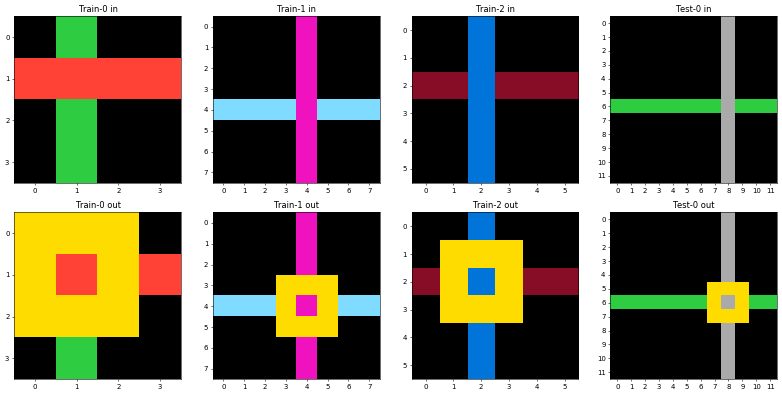

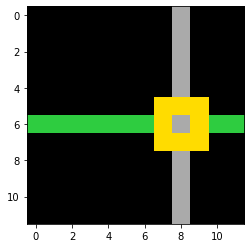

In [15]:
for i in range(400):
    task = Trains[i]
    k = len(task['test'])

    for j in range(k):        
        basic_task = Create(task, j)
        a=solve_cross_map(basic_task)
    if a!=-1:
        print(i,j)

        plot_task(task)
        plot_picture(a)

        solved_id.add(i)

In [18]:
#need count not black
def findcrossmap_line(basic_task):
    BACKGROUND=0 #
    Input = [Defensive_Copy(x) for x in basic_task[0]]
    Output = [Defensive_Copy(y) for y in basic_task[1]]
    Test_Case = Input[-1]
    Input = Input[:-1]
    name_dic={}
    crossdict={}
    for x, y in zip(Input,Output):
        x_array=np.array(x)
        y_array=np.array(y)
        for i in range(len(x)):
            for j in range(len(x[0])):
                if x[i][j]!=0:
                    c=x[i][j]
                    x_array[i,:]=c
                    x_array[:,j]=c
        x=x_array.tolist()
        
        if x_array.shape!=y_array.shape:
            return -1
        for i in range(len(x)-3+1):
            for j in range(len(x[0])-3+1):
                if x[i][j]==BACKGROUND and x[i+1][j]!=BACKGROUND and x[i+2][j]==BACKGROUND and x[i][j+1]!=BACKGROUND \
                and x[i+1][j+1]!=BACKGROUND and x[i+2][j+1]!=BACKGROUND and x[i][j+2]==BACKGROUND and x[i+1][j+2]!=BACKGROUND \
                and x[i+2][j+2]==BACKGROUND:
                    if str(x_array[i:i+3,j:j+3]) in crossdict.keys() and \
                    (crossdict[str(x_array[i:i+3,j:j+3])]!=y_array[i:i+3,j:j+3]).any():
                        return -1
                    else:
                        name_dic[str(x_array[i:i+3,j:j+3])]=x_array[i:i+3,j:j+3]
                        crossdict[str(x_array[i:i+3,j:j+3])]=y_array[i:i+3,j:j+3]
    if len(name_dic)==0:
        return -1
    return name_dic,crossdict

In [28]:
def solve_cross_map_line(basic_task):
    Input = [Defensive_Copy(x) for x in basic_task[0]]
    Output = [Defensive_Copy(y) for y in basic_task[1]]
    Test_Case = Input[-1]
    Input = Input[:-1]
    if findcrossmap_line(basic_task)==-1:
        return -1
    name_dic,crossdict=findcrossmap_line(basic_task)
    for x, y in zip(Input,Output):
        x_array=np.array(x)
        y_array=np.array(y)
        #if count>10:
        for i in range(len(x)):
            for j in range(len(x[0])):
                if x[i][j]!=0:
                    c=x[i][j]
                    x_array[i,:]=c
                    x_array[:,j]=c
        x_copy=x_array.copy()
        for i in range(len(x)-3+1):
            for j in range(len(x[0])-3+1):
                if str(x_array[i:i+3,j:j+3]) in crossdict.keys():
                    x_copy[i:i+3,j:j+3]=crossdict[str(x_array[i:i+3,j:j+3])]
        if (x_copy!=y_array).any():
            return -1

    Test_Case_array=np.array(Test_Case)
    for i in range(len(Test_Case)):
        for j in range(len(Test_Case[0])):
            if Test_Case[i][j]!=0:
                c=Test_Case[i][j]
                Test_Case_array[i,:]=c
                Test_Case_array[:,j]=c
    Test_Case_copy=Test_Case_array.copy()
    for i in range(len(Test_Case)-3+1):
        for j in range(len(Test_Case[0])-3+1):
            if str(Test_Case_array[i:i+3,j:j+3]) in crossdict.keys():
                Test_Case_copy[i:i+3,j:j+3]=crossdict[str(Test_Case_array[i:i+3,j:j+3])]
            else:
                for value in name_dic.values():
                    if checkColorMap(Test_Case_array[i:i+3,j:j+3],value)==True:
                        colormap=findColorMap(value,Test_Case_array[i:i+3,j:j+3])
                        Test_Case_copy[i:i+3,j:j+3]=np.array(applyColorMap(crossdict[str(value)],colormap))
                        break
    return Test_Case_copy.tolist()

    

46 0


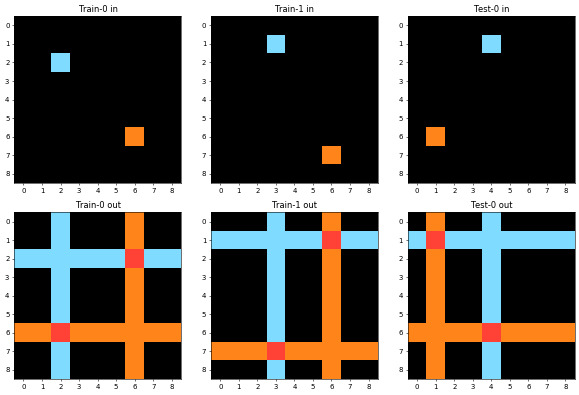

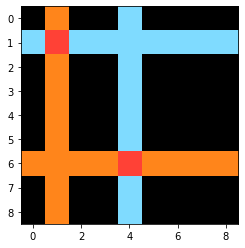

In [32]:
for i in range(400):
    task = Trains[i]
    k = len(task['test'])

    for j in range(k):        
        basic_task = Create(task, j)
        a=solve_cross_map_line(basic_task)
    if a!=-1:
        print(i,j)

        plot_task(task)
        plot_picture(a)

105 0


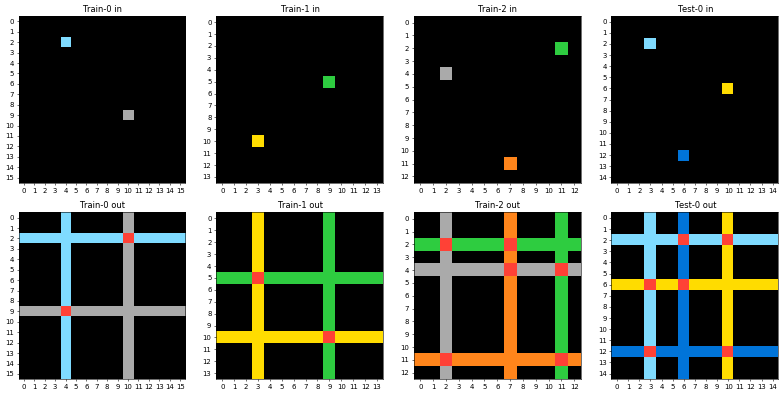

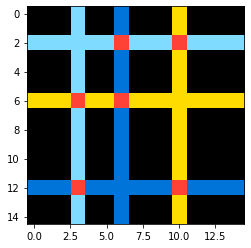

In [33]:
for i in range(400):
    task = Evals[i]
    k = len(task['test'])

    for j in range(k):        
        basic_task = Create(task, j)
        a=solve_cross_map_line(basic_task)
    if a!=-1:
        print(i,j)

        plot_task(task)
        plot_picture(a)